## Assignment 5
## by Lilian Huang

In [1]:
from __future__ import division
import pandas as pd
import numpy as np
import math
from sklearn import preprocessing, svm, tree, decomposition
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.linear_model import LogisticRegression, Perceptron, SGDClassifier, OrthogonalMatchingPursuit, RandomizedLogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cross_validation import train_test_split
from sklearn.grid_search import ParameterGrid
from sklearn.metrics import *
from sklearn.preprocessing import StandardScaler
import random
import matplotlib.pyplot as plt
from scipy import optimize
import time
import seaborn as sns
from datetime import date, datetime, timedelta
from dateutil.relativedelta import relativedelta
import pipeline_library_updated as pl
%matplotlib inline
%load_ext autoreload
%autoreload 2
pd.options.display.max_columns = None

/Users/lilianhj/anaconda/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/Users/lilianhj/anaconda/lib/python3.6/site-packages/sklearn/grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


### Part 1: Data Exploration and Wrangling

First we read in the data and carry out basic exploration such as counting the number of null values.

In [2]:
df = pl.read_data('projects_2012_2013.csv')

In [3]:
df.head()

,projectid,teacher_acctid,schoolid,school_ncesid,school_latitude,school_longitude,school_city,school_state,school_metro,school_district,school_county,school_charter,school_magnet,teacher_prefix,primary_focus_subject,primary_focus_area,secondary_focus_subject,secondary_focus_area,resource_type,poverty_level,grade_level,total_price_including_optional_support,students_reached,eligible_double_your_impact_match,date_posted,datefullyfunded
0,00001ccc0e81598c4bd86bacb94d7acb,96963218e74e10c3764a5cfb153e6fea,9f3f9f2c2da7edda5648ccd10554ed8c,1.709930e+11,41.807654,-87.673257,Chicago,IL,urban,Pershing Elem Network,Cook,f,f,Mrs.,Mathematics,Math & Science,Visual Arts,Music & The Arts,Supplies,highest poverty,Grades PreK-2,1498.61,31.0,f,4/14/13,5/2/13
1,0000fa3aa8f6649abab23615b546016d,2a578595fe351e7fce057e048c409b18,3432ed3d4466fac2f2ead83ab354e333,6.409801e+10,34.296596,-119.296596,Ventura,CA,urban,Ventura Unif School District,Ventura,f,f,Mrs.,Civics & Government,History & Civics,Literature & Writing,Literacy & Language,Books,highest poverty,Grades 3-5,282.47,28.0,t,4/7/12,4/18/12
2,000134f07d4b30140d63262c871748ff,26bd60377bdbffb53a644a16c5308e82,dc8dcb501c3b2bb0b10e9c6ee2cd8afd,6.227100e+10,34.078625,-118.257834,Los Angeles,CA,urban,Los Angeles Unif Sch Dist,Los Angeles,f,f,Ms.,Literacy,Literacy & Language,Social Sciences,History & Civics,Technology,high poverty,Grades 3-5,1012.38,56.0,f,1/30/12,4/15/12
3,0001f2d0b3827bba67cdbeaa248b832d,15d900805d9d716c051c671827109f45,8bea7e8c6e4279fca6276128db89292e,3.600090e+11,40.687286,-73.988217,Brooklyn,NY,urban,New York City Dept Of Ed,Kings (Brooklyn),f,t,Ms.,Literacy,Literacy & Language,NaN,NaN,Books,high poverty,Grades PreK-2,175.33,23.0,f,10/11/12,12/5/12
4,0004536db996ba697ca72c9e058bfe69,400f8b82bb0143f6a40b217a517fe311,fbdefab6fe41e12c55886c610c110753,3.606870e+11,40.793018,-73.205635,Central Islip,NY,suburban,Central Islip Union Free SD,Suffolk,f,f,Mrs.,Literacy,Literacy & Language,Literature & Writing,Literacy & Language,Technology,high poverty,Grades PreK-2,3591.11,150.0,f,1/8/13,3/25/13


In [4]:
pl.info(df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124976 entries, 0 to 124975
Data columns (total 26 columns):
projectid                                 124976 non-null object
teacher_acctid                            124976 non-null object
schoolid                                  124976 non-null object
school_ncesid                             115743 non-null float64
school_latitude                           124976 non-null float64
school_longitude                          124976 non-null float64
school_city                               124976 non-null object
school_state                              124976 non-null object
school_metro                              109752 non-null object
school_district                           124804 non-null object
school_county                             124976 non-null object
school_charter                            124976 non-null object
school_magnet                             124976 non-null object
teacher_prefix                           

In [5]:
pl.null_count(df)

projectid                                     0
teacher_acctid                                0
schoolid                                      0
school_ncesid                              9233
school_latitude                               0
school_longitude                              0
school_city                                   0
school_state                                  0
school_metro                              15224
school_district                             172
school_county                                 0
school_charter                                0
school_magnet                                 0
teacher_prefix                                0
primary_focus_subject                        15
primary_focus_area                           15
secondary_focus_subject                   40556
secondary_focus_area                      40556
resource_type                                17
poverty_level                                 0
grade_level                             

We set some column types as categorical.

In [6]:
for colname in ['school_metro', 'teacher_prefix', 'primary_focus_subject', 'primary_focus_area', 
                'secondary_focus_subject', 'secondary_focus_area', 'resource_type', 'poverty_level', 'grade_level']:
    df[colname] = df[colname].astype('category')

In [7]:
df.dtypes

projectid                                   object
teacher_acctid                              object
schoolid                                    object
school_ncesid                              float64
school_latitude                            float64
school_longitude                           float64
school_city                                 object
school_state                                object
school_metro                              category
school_district                             object
school_county                               object
school_charter                              object
school_magnet                               object
teacher_prefix                            category
primary_focus_subject                     category
primary_focus_area                        category
secondary_focus_subject                   category
secondary_focus_area                      category
resource_type                             category
poverty_level                  

We see that there are some boolean columns which are coded as "t" and "f" instead of 1 and 0, so we recode them and confirm that this was successful.

In [8]:
for colname in ['school_charter', 'school_magnet', 'eligible_double_your_impact_match']:
    pl.recode_booleans(df, colname, 't', 'f')

In [9]:
df.head()

,projectid,teacher_acctid,schoolid,school_ncesid,school_latitude,school_longitude,school_city,school_state,school_metro,school_district,school_county,school_charter,school_magnet,teacher_prefix,primary_focus_subject,primary_focus_area,secondary_focus_subject,secondary_focus_area,resource_type,poverty_level,grade_level,total_price_including_optional_support,students_reached,eligible_double_your_impact_match,date_posted,datefullyfunded
0,00001ccc0e81598c4bd86bacb94d7acb,96963218e74e10c3764a5cfb153e6fea,9f3f9f2c2da7edda5648ccd10554ed8c,1.709930e+11,41.807654,-87.673257,Chicago,IL,urban,Pershing Elem Network,Cook,0,0,Mrs.,Mathematics,Math & Science,Visual Arts,Music & The Arts,Supplies,highest poverty,Grades PreK-2,1498.61,31.0,0,4/14/13,5/2/13
1,0000fa3aa8f6649abab23615b546016d,2a578595fe351e7fce057e048c409b18,3432ed3d4466fac2f2ead83ab354e333,6.409801e+10,34.296596,-119.296596,Ventura,CA,urban,Ventura Unif School District,Ventura,0,0,Mrs.,Civics & Government,History & Civics,Literature & Writing,Literacy & Language,Books,highest poverty,Grades 3-5,282.47,28.0,1,4/7/12,4/18/12
2,000134f07d4b30140d63262c871748ff,26bd60377bdbffb53a644a16c5308e82,dc8dcb501c3b2bb0b10e9c6ee2cd8afd,6.227100e+10,34.078625,-118.257834,Los Angeles,CA,urban,Los Angeles Unif Sch Dist,Los Angeles,0,0,Ms.,Literacy,Literacy & Language,Social Sciences,History & Civics,Technology,high poverty,Grades 3-5,1012.38,56.0,0,1/30/12,4/15/12
3,0001f2d0b3827bba67cdbeaa248b832d,15d900805d9d716c051c671827109f45,8bea7e8c6e4279fca6276128db89292e,3.600090e+11,40.687286,-73.988217,Brooklyn,NY,urban,New York City Dept Of Ed,Kings (Brooklyn),0,1,Ms.,Literacy,Literacy & Language,NaN,NaN,Books,high poverty,Grades PreK-2,175.33,23.0,0,10/11/12,12/5/12
4,0004536db996ba697ca72c9e058bfe69,400f8b82bb0143f6a40b217a517fe311,fbdefab6fe41e12c55886c610c110753,3.606870e+11,40.793018,-73.205635,Central Islip,NY,suburban,Central Islip Union Free SD,Suffolk,0,0,Mrs.,Literacy,Literacy & Language,Literature & Writing,Literacy & Language,Technology,high poverty,Grades PreK-2,3591.11,150.0,0,1/8/13,3/25/13


We now look at summary statistics for the numeric columns.

In [10]:
pl.summ_stats(df)

,school_ncesid,school_latitude,school_longitude,school_charter,school_magnet,total_price_including_optional_support,students_reached,eligible_double_your_impact_match
count,1.157430e+05,124976.000000,124976.000000,124976.000000,124976.000000,124976.000000,124917.000000,124976.000000
mean,2.448448e+11,36.827284,-95.859299,0.093106,0.085640,654.011811,95.445760,0.296769
std,1.644728e+11,4.963669,18.392876,0.290582,0.279833,1098.015854,163.481912,0.456836
min,1.000050e+10,18.249140,-171.690554,0.000000,0.000000,92.000000,1.000000,0.000000
25%,6.344101e+10,33.872504,-117.806418,0.000000,0.000000,345.810000,23.000000,0.000000
50%,2.200870e+11,36.617410,-90.101563,0.000000,0.000000,510.500000,30.000000,0.000000
75%,3.704880e+11,40.676156,-80.713740,0.000000,0.000000,752.960000,100.000000,1.000000
max,6.100010e+11,65.672562,-66.628036,1.000000,1.000000,164382.840000,12143.000000,1.000000


We also have to create our desired outcome variable - whether a project will not get fully funded within 60 days of posting.

In [11]:
df['date_posted'] = pd.to_datetime(df['date_posted'])
df['datefullyfunded'] = pd.to_datetime(df['datefullyfunded'])

In [12]:
df['days_to_funded'] = (df['datefullyfunded'] - df['date_posted']).dt.days

In [13]:
df.head()

,projectid,teacher_acctid,schoolid,school_ncesid,school_latitude,school_longitude,school_city,school_state,school_metro,school_district,school_county,school_charter,school_magnet,teacher_prefix,primary_focus_subject,primary_focus_area,secondary_focus_subject,secondary_focus_area,resource_type,poverty_level,grade_level,total_price_including_optional_support,students_reached,eligible_double_your_impact_match,date_posted,datefullyfunded,days_to_funded
0,00001ccc0e81598c4bd86bacb94d7acb,96963218e74e10c3764a5cfb153e6fea,9f3f9f2c2da7edda5648ccd10554ed8c,1.709930e+11,41.807654,-87.673257,Chicago,IL,urban,Pershing Elem Network,Cook,0,0,Mrs.,Mathematics,Math & Science,Visual Arts,Music & The Arts,Supplies,highest poverty,Grades PreK-2,1498.61,31.0,0,2013-04-14,2013-05-02,18
1,0000fa3aa8f6649abab23615b546016d,2a578595fe351e7fce057e048c409b18,3432ed3d4466fac2f2ead83ab354e333,6.409801e+10,34.296596,-119.296596,Ventura,CA,urban,Ventura Unif School District,Ventura,0,0,Mrs.,Civics & Government,History & Civics,Literature & Writing,Literacy & Language,Books,highest poverty,Grades 3-5,282.47,28.0,1,2012-04-07,2012-04-18,11
2,000134f07d4b30140d63262c871748ff,26bd60377bdbffb53a644a16c5308e82,dc8dcb501c3b2bb0b10e9c6ee2cd8afd,6.227100e+10,34.078625,-118.257834,Los Angeles,CA,urban,Los Angeles Unif Sch Dist,Los Angeles,0,0,Ms.,Literacy,Literacy & Language,Social Sciences,History & Civics,Technology,high poverty,Grades 3-5,1012.38,56.0,0,2012-01-30,2012-04-15,76
3,0001f2d0b3827bba67cdbeaa248b832d,15d900805d9d716c051c671827109f45,8bea7e8c6e4279fca6276128db89292e,3.600090e+11,40.687286,-73.988217,Brooklyn,NY,urban,New York City Dept Of Ed,Kings (Brooklyn),0,1,Ms.,Literacy,Literacy & Language,NaN,NaN,Books,high poverty,Grades PreK-2,175.33,23.0,0,2012-10-11,2012-12-05,55
4,0004536db996ba697ca72c9e058bfe69,400f8b82bb0143f6a40b217a517fe311,fbdefab6fe41e12c55886c610c110753,3.606870e+11,40.793018,-73.205635,Central Islip,NY,suburban,Central Islip Union Free SD,Suffolk,0,0,Mrs.,Literacy,Literacy & Language,Literature & Writing,Literacy & Language,Technology,high poverty,Grades PreK-2,3591.11,150.0,0,2013-01-08,2013-03-25,76


In [14]:
df['fundedin60'] = np.where(df['days_to_funded'] > 60, 1, 0)

In [15]:
df.head()

,projectid,teacher_acctid,schoolid,school_ncesid,school_latitude,school_longitude,school_city,school_state,school_metro,school_district,school_county,school_charter,school_magnet,teacher_prefix,primary_focus_subject,primary_focus_area,secondary_focus_subject,secondary_focus_area,resource_type,poverty_level,grade_level,total_price_including_optional_support,students_reached,eligible_double_your_impact_match,date_posted,datefullyfunded,days_to_funded,fundedin60
0,00001ccc0e81598c4bd86bacb94d7acb,96963218e74e10c3764a5cfb153e6fea,9f3f9f2c2da7edda5648ccd10554ed8c,1.709930e+11,41.807654,-87.673257,Chicago,IL,urban,Pershing Elem Network,Cook,0,0,Mrs.,Mathematics,Math & Science,Visual Arts,Music & The Arts,Supplies,highest poverty,Grades PreK-2,1498.61,31.0,0,2013-04-14,2013-05-02,18,0
1,0000fa3aa8f6649abab23615b546016d,2a578595fe351e7fce057e048c409b18,3432ed3d4466fac2f2ead83ab354e333,6.409801e+10,34.296596,-119.296596,Ventura,CA,urban,Ventura Unif School District,Ventura,0,0,Mrs.,Civics & Government,History & Civics,Literature & Writing,Literacy & Language,Books,highest poverty,Grades 3-5,282.47,28.0,1,2012-04-07,2012-04-18,11,0
2,000134f07d4b30140d63262c871748ff,26bd60377bdbffb53a644a16c5308e82,dc8dcb501c3b2bb0b10e9c6ee2cd8afd,6.227100e+10,34.078625,-118.257834,Los Angeles,CA,urban,Los Angeles Unif Sch Dist,Los Angeles,0,0,Ms.,Literacy,Literacy & Language,Social Sciences,History & Civics,Technology,high poverty,Grades 3-5,1012.38,56.0,0,2012-01-30,2012-04-15,76,1
3,0001f2d0b3827bba67cdbeaa248b832d,15d900805d9d716c051c671827109f45,8bea7e8c6e4279fca6276128db89292e,3.600090e+11,40.687286,-73.988217,Brooklyn,NY,urban,New York City Dept Of Ed,Kings (Brooklyn),0,1,Ms.,Literacy,Literacy & Language,NaN,NaN,Books,high poverty,Grades PreK-2,175.33,23.0,0,2012-10-11,2012-12-05,55,0
4,0004536db996ba697ca72c9e058bfe69,400f8b82bb0143f6a40b217a517fe311,fbdefab6fe41e12c55886c610c110753,3.606870e+11,40.793018,-73.205635,Central Islip,NY,suburban,Central Islip Union Free SD,Suffolk,0,0,Mrs.,Literacy,Literacy & Language,Literature & Writing,Literacy & Language,Technology,high poverty,Grades PreK-2,3591.11,150.0,0,2013-01-08,2013-03-25,76,1


We see that 28.8% of the observations have a label of 1, i.e. they were not fully funded in 60 days.

In [16]:
pl.make_percent_table(df, "fundedin60")

,fundedin60,count,percent
0,0,88966,71.186468
1,1,36010,28.813532


We then carry out more data exploration by producing histograms of each numeric variable, and tables counting the values of each categorical variable.

We see that, for example, 50% of the proposed projects are for urban schools, and 38% serve pre-K to 2nd grade students. the most popular types of resources requested are technology and supplies. 

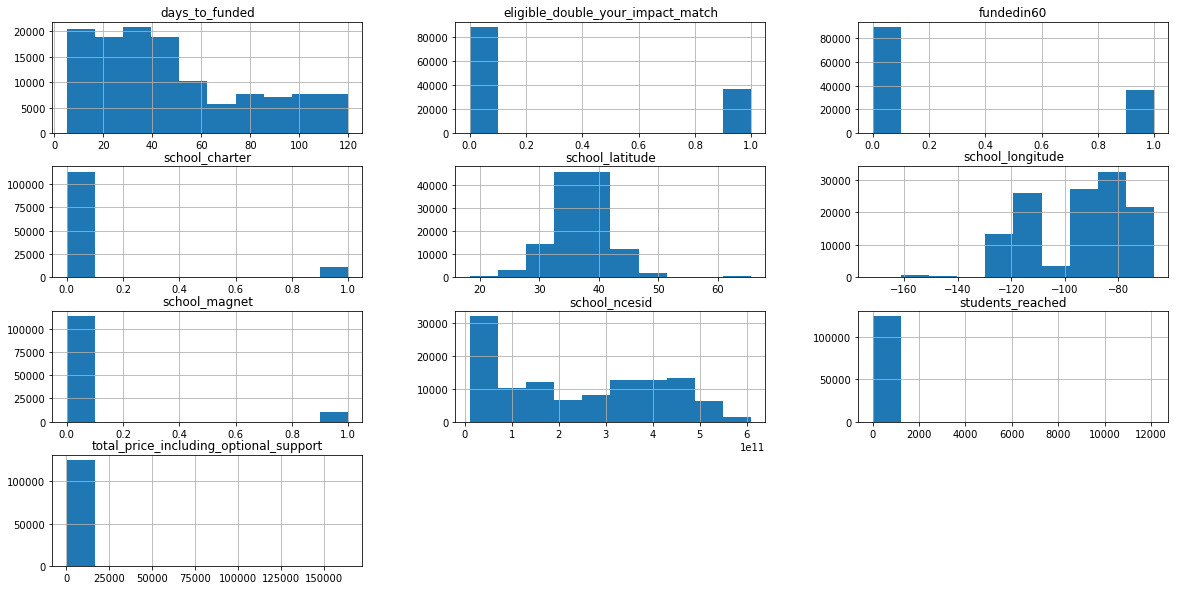

In [17]:
pl.make_hist(df, 20, 10)

In [18]:
table = pl.make_percent_table(df, "school_metro")
table.sort_values(by="percent", ascending=False)

,school_metro,count,percent
2,urban,62267,49.823166
1,suburban,33084,26.472283
0,rural,14401,11.523012


In [19]:
table = pl.make_percent_table(df, "teacher_prefix")
table.sort_values(by="percent", ascending=False)

,teacher_prefix,count,percent
2,Mrs.,60190,48.161247
3,Ms.,48511,38.816253
1,Mr.,16273,13.020900
0,Dr.,2,0.001600


In [20]:
table = pl.make_percent_table(df, "primary_focus_subject")
table.sort_values(by="percent", ascending=False)

,primary_focus_subject,count,percent
15,Literacy,37408,29.932147
17,Mathematics,16859,13.489790
16,Literature & Writing,16141,12.915280
24,Special Needs,8348,6.679682
26,Visual Arts,5870,4.696902
0,Applied Sciences,5825,4.660895
8,Environmental Science,4835,3.868743
12,Health & Life Science,4185,3.348643
18,Music,3931,3.145404
14,History & Geography,2701,2.161215


In [21]:
table = pl.make_percent_table(df, "primary_focus_area")
table.sort_values(by="percent", ascending=False)

,primary_focus_area,count,percent
3,Literacy & Language,56051,44.849411
4,Math & Science,31704,25.368071
5,Music & The Arts,11483,9.188164
0,Applied Learning,8722,6.978940
6,Special Needs,8348,6.679682
2,History & Civics,5158,4.127192
1,Health & Sports,3495,2.796537


In [22]:
table = pl.make_percent_table(df, "secondary_focus_subject")
table.sort_values(by="percent", ascending=False)

,secondary_focus_subject,count,percent
15,Literacy,12598,10.080335
17,Mathematics,12513,10.012322
16,Literature & Writing,12389,9.913103
24,Special Needs,5217,4.174401
5,ESL,4698,3.759122
6,Early Development,3599,2.879753
0,Applied Sciences,3380,2.704519
12,Health & Life Science,3103,2.482877
8,Environmental Science,2997,2.398060
14,History & Geography,2918,2.334848


In [23]:
table = pl.make_percent_table(df, "secondary_focus_area")
table.sort_values(by="percent", ascending=False)

,secondary_focus_area,count,percent
3,Literacy & Language,30056,24.049417
4,Math & Science,21993,17.597779
0,Applied Learning,11562,9.251376
2,History & Civics,6781,5.425842
5,Music & The Arts,5803,4.643292
6,Special Needs,5217,4.174401
1,Health & Sports,3008,2.406862


In [24]:
table = pl.make_percent_table(df, "resource_type")
table.sort_values(by="percent", ascending=False)

,resource_type,count,percent
3,Technology,45886,36.715849
2,Supplies,40270,32.222187
0,Books,24226,19.384522
1,Other,13732,10.987710
4,Trips,702,0.561708
5,Visitors,143,0.114422


In [25]:
table = pl.make_percent_table(df, "poverty_level")
table.sort_values(by="percent", ascending=False)

,poverty_level,count,percent
1,highest poverty,67752,54.212009
0,high poverty,34361,27.494079
3,moderate poverty,19066,15.255729
2,low poverty,3797,3.038183


In [26]:
table = pl.make_percent_table(df, "grade_level")
table.sort_values(by="percent", ascending=False)

,grade_level,count,percent
3,Grades PreK-2,47730,38.191333
0,Grades 3-5,39242,31.399629
1,Grades 6-8,21479,17.186500
2,Grades 9-12,16522,13.220138


We produce a heatmap of correlations between variables, but no correlations stand out as being especially noteworthy. The outcome variable (not being funded within 60 days of posting) is highly correlated with the days to the project being funded, but this is obvious by construction.

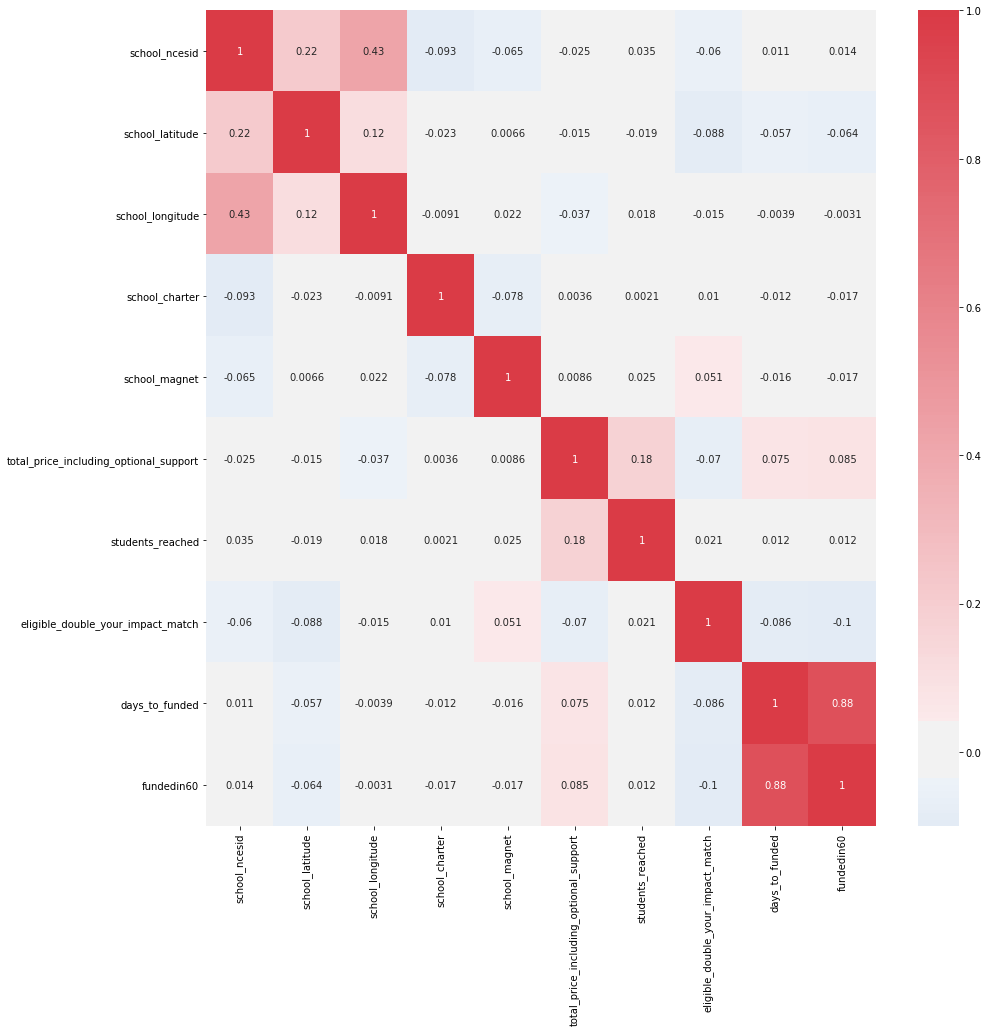

In [27]:
pl.corr_heatmap(df, 15, 15)

We also produce boxplots of some variables.

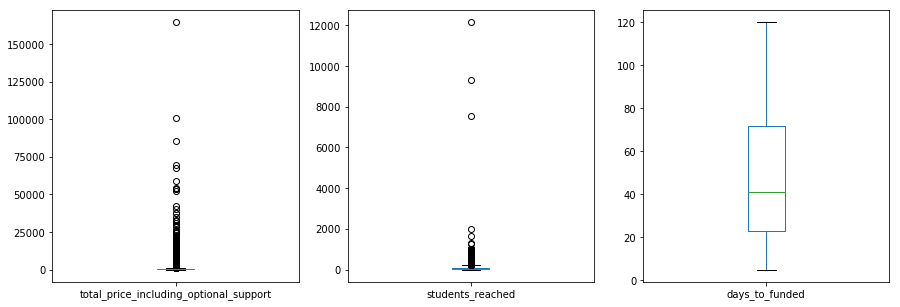

In [28]:
pl.make_box(df[['total_price_including_optional_support', 'students_reached', 'days_to_funded']], 15, 5)

In [29]:
pl.null_count(df)

projectid                                     0
teacher_acctid                                0
schoolid                                      0
school_ncesid                              9233
school_latitude                               0
school_longitude                              0
school_city                                   0
school_state                                  0
school_metro                              15224
school_district                             172
school_county                                 0
school_charter                                0
school_magnet                                 0
teacher_prefix                                0
primary_focus_subject                        15
primary_focus_area                           15
secondary_focus_subject                   40556
secondary_focus_area                      40556
resource_type                                17
poverty_level                                 0
grade_level                             

### Part 2: Splitting, Imputing, and Generating Features

First we find what dates at which to split our data into training and test sets.
We want our test set to be a rolling window of 6 months, which will give us three test sets. The training sets are everything from 1/1/12 to the beginning of that respective test set. We then split the data accordingly.

We make sure to leave a gap of 60 days between training and testing data, in order to observe the outcome of the training data.

We only carry out imputation at this point in order to avoid violating the independence of the training and testing datasets, which is what would happen if we imputed before splitting into training/testing sets.

We now fill in null values in the dataframe. For numeric variables, we use the median of that column, while for non-numeric variables, we use the value that occurs most frequently in that column. With more domain knowledge, it would be possible to carry out more fine-grained imputation of missing variables.

In [30]:
splits = pl.temporal_validate('2012-01-01', '2013-12-31', [6], 60)
splits

[[datetime.datetime(2012, 1, 1, 0, 0),
  datetime.datetime(2012, 4, 30, 0, 0),
  datetime.datetime(2012, 7, 1, 0, 0),
  datetime.datetime(2012, 10, 31, 0, 0)],
 [datetime.datetime(2012, 1, 1, 0, 0),
  datetime.datetime(2012, 10, 31, 0, 0),
  datetime.datetime(2013, 1, 1, 0, 0),
  datetime.datetime(2013, 4, 30, 0, 0)],
 [datetime.datetime(2012, 1, 1, 0, 0),
  datetime.datetime(2013, 4, 30, 0, 0),
  datetime.datetime(2013, 7, 1, 0, 0),
  datetime.datetime(2013, 10, 31, 0, 0)]]

In [31]:
df_lst = []
pl.make_all_splits(df, 'date_posted', df_lst, splits)

[datetime.datetime(2012, 1, 1, 0, 0), datetime.datetime(2012, 4, 30, 0, 0), datetime.datetime(2012, 7, 1, 0, 0), datetime.datetime(2012, 10, 31, 0, 0)]
train (21180, 28), test (23294, 28)
[datetime.datetime(2012, 1, 1, 0, 0), datetime.datetime(2012, 10, 31, 0, 0), datetime.datetime(2013, 1, 1, 0, 0), datetime.datetime(2013, 4, 30, 0, 0)]
train (49680, 28), test (15017, 28)
[datetime.datetime(2012, 1, 1, 0, 0), datetime.datetime(2013, 4, 30, 0, 0), datetime.datetime(2013, 7, 1, 0, 0), datetime.datetime(2013, 10, 31, 0, 0)]
train (74241, 28), test (31563, 28)


We then generate dummy variables from the categorical variables, and drop the original variables that have now been converted to dummies.
We also drop ID variables, and geographical variables, which are too granular to contribute to the model.

In [32]:
new_df_lst = []

In [33]:
for sublst in df_lst:
    print(len(sublst))
    newsublst = []
    for df in sublst:
        print(df.shape)
        df = pl.make_dummies_all_cat(df)
        newsublst.append(df)
    new_df_lst.append(newsublst)

2
(21180, 28)
(23294, 28)
2
(49680, 28)
(15017, 28)
2
(74241, 28)
(31563, 28)


In [34]:
new_df_lst[0][0].dtypes

projectid                                               object
teacher_acctid                                          object
schoolid                                                object
school_ncesid                                          float64
school_latitude                                        float64
school_longitude                                       float64
school_city                                             object
school_state                                            object
school_metro                                          category
school_district                                         object
school_county                                           object
school_charter                                           int64
school_magnet                                            int64
teacher_prefix                                        category
primary_focus_subject                                 category
primary_focus_area                                    c

In [35]:
new_df_lst[0][1].head()

,projectid,teacher_acctid,schoolid,school_ncesid,school_latitude,school_longitude,school_city,school_state,school_metro,school_district,school_county,school_charter,school_magnet,teacher_prefix,primary_focus_subject,primary_focus_area,secondary_focus_subject,secondary_focus_area,resource_type,poverty_level,grade_level,total_price_including_optional_support,students_reached,eligible_double_your_impact_match,date_posted,datefullyfunded,days_to_funded,fundedin60,school_metro_suburban,school_metro_urban,teacher_prefix_Mr.,teacher_prefix_Mrs.,teacher_prefix_Ms.,primary_focus_subject_Character Education,primary_focus_subject_Civics & Government,primary_focus_subject_College & Career Prep,primary_focus_subject_Community Service,primary_focus_subject_ESL,primary_focus_subject_Early Development,primary_focus_subject_Economics,primary_focus_subject_Environmental Science,primary_focus_subject_Extracurricular,primary_focus_subject_Foreign Languages,primary_focus_subject_Gym & Fitness,primary_focus_subject_Health & Life Science,primary_focus_subject_Health & Wellness,primary_focus_subject_History & Geography,primary_focus_subject_Literacy,primary_focus_subject_Literature & Writing,primary_focus_subject_Mathematics,primary_focus_subject_Music,primary_focus_subject_Nutrition,primary_focus_subject_Other,primary_focus_subject_Parent Involvement,primary_focus_subject_Performing Arts,primary_focus_subject_Social Sciences,primary_focus_subject_Special Needs,primary_focus_subject_Sports,primary_focus_subject_Visual Arts,primary_focus_area_Health & Sports,primary_focus_area_History & Civics,primary_focus_area_Literacy & Language,primary_focus_area_Math & Science,primary_focus_area_Music & The Arts,primary_focus_area_Special Needs,secondary_focus_subject_Character Education,secondary_focus_subject_Civics & Government,secondary_focus_subject_College & Career Prep,secondary_focus_subject_Community Service,secondary_focus_subject_ESL,secondary_focus_subject_Early Development,secondary_focus_subject_Economics,secondary_focus_subject_Environmental Science,secondary_focus_subject_Extracurricular,secondary_focus_subject_Foreign Languages,secondary_focus_subject_Gym & Fitness,secondary_focus_subject_Health & Life Science,secondary_focus_subject_Health & Wellness,secondary_focus_subject_History & Geography,secondary_focus_subject_Literacy,secondary_focus_subject_Literature & Writing,secondary_focus_subject_Mathematics,secondary_focus_subject_Music,secondary_focus_subject_Nutrition,secondary_focus_subject_Other,secondary_focus_subject_Parent Involvement,secondary_focus_subject_Performing Arts,secondary_focus_subject_Social Sciences,secondary_focus_subject_Special Needs,secondary_focus_subject_Sports,secondary_focus_subject_Visual Arts,secondary_focus_area_Health & Sports,secondary_focus_area_History & Civics,secondary_focus_area_Literacy & Language,secondary_focus_area_Math & Science,secondary_focus_area_Music & The Arts,secondary_focus_area_Special Needs,resource_type_Other,resource_type_Supplies,resource_type_Technology,resource_type_Trips,resource_type_Visitors,poverty_level_highest poverty,poverty_level_low poverty,poverty_level_moderate poverty,grade_level_Grades 6-8,grade_level_Grades 9-12,grade_level_Grades PreK-2
3,0001f2d0b3827bba67cdbeaa248b832d,15d900805d9d716c051c671827109f45,8bea7e8c6e4279fca6276128db89292e,3.600090e+11,40.687286,-73.988217,Brooklyn,NY,urban,New York City Dept Of Ed,Kings (Brooklyn),0,1,Ms.,Literacy,Literacy & Language,Literacy,Literacy & Language,Books,high poverty,Grades PreK-2,175.33,23.0,0,2012-10-11,2012-12-05,55,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
9,0008ac907bf237a15a959244205d3ee5,92527a5ac5fe946ed1961fb2e1de8cc5,23e34f5d2e2940684269cffe35741598,6.271800e+10,34.381832,-118.531837,Newhall,CA,suburban,Newhall School District,Los Angeles,0,0,Ms.,Mathematics,Math & Science,Literacy,Literacy & Language,T

In [36]:
df_lst_3 = []

In [37]:
for sublst in new_df_lst:
    print(len(sublst))
    newsublst = []
    for df in sublst:
        print(df.shape)
        reduced_df = df.drop(['projectid', 'teacher_acctid', 'schoolid', 'school_ncesid', 
                      'school_latitude', 'school_longitude', 'school_city', 'school_state', 
                      'school_district', 'school_county'], axis = 1)
        cat = df.select_dtypes(include=['category'])
        for col in cat:
            reduced_df = reduced_df.drop(col, axis = 1)
        newsublst.append(reduced_df)
    df_lst_3.append(newsublst)

2
(21180, 108)
(23294, 108)
2
(49680, 108)
(15017, 108)
2
(74241, 108)
(31563, 108)


In [38]:
df_lst_3[2][1].dtypes

school_charter                                           int64
school_magnet                                            int64
total_price_including_optional_support                 float64
students_reached                                       float64
eligible_double_your_impact_match                        int64
date_posted                                     datetime64[ns]
datefullyfunded                                 datetime64[ns]
days_to_funded                                           int64
fundedin60                                               int64
school_metro_suburban                                    uint8
school_metro_urban                                       uint8
teacher_prefix_Mr.                                       uint8
teacher_prefix_Mrs.                                      uint8
teacher_prefix_Ms.                                       uint8
primary_focus_subject_Character Education                uint8
primary_focus_subject_Civics & Government              

We also bin the continuous variables "students_reached" and "total_price_including_optional_support" into discrete categories, using percentiles since these have a large range. We then drop the original continuous variables.

In [39]:
df_lst_4 = []

In [40]:
for sublst in df_lst_3:
    print(len(sublst))
    newsublst = []
    for df in sublst:
        print(df.shape)
        student_bins = pl.get_thresholds(df, "students_reached")
        print("student bins", student_bins)
        df, bins = pl.discretize(df, "students_reached", bins=student_bins)
        price_bins = pl.get_thresholds(df, "total_price_including_optional_support")
        print("price bins", price_bins)
        df, bins = pl.discretize(df, "total_price_including_optional_support", bins=price_bins)
        newsublst.append(df)
    df_lst_4.append(newsublst)

2
(21180, 89)
student bins [1.0, 21.0, 25.0, 40.0, 105.0, 999.0]
price bins [109.25, 312.45, 445.80999999999995, 553.4, 762.2160000000001, 67461.26]
(23294, 89)
student bins [1.0, 22.0, 27.0, 50.0, 120.0, 12143.0]
price bins [99.08, 297.772, 434.4220000000001, 541.5859999999999, 757.008, 100800.01]
2
(49680, 89)
student bins [1.0, 21.0, 26.0, 45.0, 120.0, 12143.0]
price bins [99.08, 302.62, 438.52, 546.134, 757.8380000000004, 100800.01]
(15017, 89)
student bins [1.0, 20.0, 25.0, 45.0, 110.0, 999.0]
price bins [92.0, 277.07800000000003, 428.54200000000003, 543.746, 787.2060000000001, 42366.76]
2
(74241, 89)
student bins [1.0, 21.0, 26.0, 46.0, 120.0, 12143.0]
price bins [92.0, 299.81, 441.65, 549.45, 778.27, 100800.01]
(31563, 89)
student bins [1.0, 22.0, 27.0, 50.0, 120.0, 999.0]
price bins [111.78, 318.0, 471.21, 598.2040000000001, 900.876, 164382.84]


In [41]:
df_lst_4[2][1][["students_reached", "students_reached_discrete"]].head(n=50)

,students_reached,students_reached_discrete
8,25.0,1
10,25.0,1
13,809.0,4
21,100.0,3
29,30.0,2
36,85.0,3
38,15.0,0
40,90.0,3
41,25.0,1
43,400.0,4


In [42]:
df_lst_4[2][1][["total_price_including_optional_support", "total_price_including_optional_support_discrete"]].head(n=50)

,total_price_including_optional_support,total_price_including_optional_support_discrete
8,838.75,3
10,194.11,0
13,1108.94,4
21,221.56,0
29,371.81,1
36,562.06,2
38,981.62,4
40,198.34,0
41,229.66,0
43,388.22,1


In [43]:
df_lst_5 = []

In [44]:
for sublst in df_lst_4:
    print(len(sublst))
    newsublst = []
    for df in sublst:
        df = df.drop(["students_reached", "total_price_including_optional_support"], axis = 1)
        newsublst.append(df)
    df_lst_5.append(newsublst)

2
2
2


In [45]:
pl.info(df_lst_5[2][0])

<class 'pandas.core.frame.DataFrame'>
Int64Index: 74241 entries, 0 to 124975
Data columns (total 89 columns):
school_charter                                     74241 non-null int64
school_magnet                                      74241 non-null int64
eligible_double_your_impact_match                  74241 non-null int64
date_posted                                        74241 non-null datetime64[ns]
datefullyfunded                                    74241 non-null datetime64[ns]
days_to_funded                                     74241 non-null int64
fundedin60                                         74241 non-null int64
school_metro_suburban                              74241 non-null uint8
school_metro_urban                                 74241 non-null uint8
teacher_prefix_Mr.                                 74241 non-null uint8
teacher_prefix_Mrs.                                74241 non-null uint8
teacher_prefix_Ms.                                 74241 non-null uint8
primary_

With all desired features present, we look at one of the dataframes.

In [46]:
pl.info(df_lst_5[2][0])

<class 'pandas.core.frame.DataFrame'>
Int64Index: 74241 entries, 0 to 124975
Data columns (total 89 columns):
school_charter                                     74241 non-null int64
school_magnet                                      74241 non-null int64
eligible_double_your_impact_match                  74241 non-null int64
date_posted                                        74241 non-null datetime64[ns]
datefullyfunded                                    74241 non-null datetime64[ns]
days_to_funded                                     74241 non-null int64
fundedin60                                         74241 non-null int64
school_metro_suburban                              74241 non-null uint8
school_metro_urban                                 74241 non-null uint8
teacher_prefix_Mr.                                 74241 non-null uint8
teacher_prefix_Mrs.                                74241 non-null uint8
teacher_prefix_Ms.                                 74241 non-null uint8
primary_

In [47]:
pl.summ_stats(df_lst_5[2][0])

,school_charter,school_magnet,eligible_double_your_impact_match,days_to_funded,fundedin60,school_metro_suburban,school_metro_urban,teacher_prefix_Mr.,teacher_prefix_Mrs.,teacher_prefix_Ms.,primary_focus_subject_Character Education,primary_focus_subject_Civics & Government,primary_focus_subject_College & Career Prep,primary_focus_subject_Community Service,primary_focus_subject_ESL,primary_focus_subject_Early Development,primary_focus_subject_Economics,primary_focus_subject_Environmental Science,primary_focus_subject_Extracurricular,primary_focus_subject_Foreign Languages,primary_focus_subject_Gym & Fitness,primary_focus_subject_Health & Life Science,primary_focus_subject_Health & Wellness,primary_focus_subject_History & Geography,primary_focus_subject_Literacy,primary_focus_subject_Literature & Writing,primary_focus_subject_Mathematics,primary_focus_subject_Music,primary_focus_subject_Nutrition,primary_focus_subject_Other,primary_focus_subject_Parent Involvement,primary_focus_subject_Performing Arts,primary_focus_subject_Social Sciences,primary_focus_subject_Special Needs,primary_focus_subject_Sports,primary_focus_subject_Visual Arts,primary_focus_area_Health & Sports,primary_focus_area_History & Civics,primary_focus_area_Literacy & Language,primary_focus_area_Math & Science,primary_focus_area_Music & The Arts,primary_focus_area_Special Needs,secondary_focus_subject_Character Education,secondary_focus_subject_Civics & Government,secondary_focus_subject_College & Career Prep,secondary_focus_subject_Community Service,secondary_focus_subject_ESL,secondary_focus_subject_Early Development,secondary_focus_subject_Economics,secondary_focus_subject_Environmental Science,secondary_focus_subject_Extracurricular,secondary_focus_subject_Foreign Languages,secondary_focus_subject_Gym & Fitness,secondary_focus_subject_Health & Life Science,secondary_focus_subject_Health & Wellness,secondary_focus_subject_History & Geography,secondary_focus_subject_Literacy,secondary_focus_subject_Literature & Writing,secondary_focus_subject_Mathematics,secondary_focus_subject_Music,secondary_focus_subject_Nutrition,secondary_focus_subject_Other,secondary_focus_subject_Parent Involvement,secondary_focus_subject_Performing Arts,secondary_focus_subject_Social Sciences,secondary_focus_subject_Special Needs,secondary_focus_subject_Sports,secondary_focus_subject_Visual Arts,secondary_focus_area_Health & Sports,secondary_focus_area_History & Civics,secondary_focus_area_Literacy & Language,secondary_focus_area_Math & Science,secondary_focus_area_Music & The Arts,secondary_focus_area_Special Needs,resource_type_Other,resource_type_Supplies,resource_type_Technology,resource_type_Trips,resource_type_Visitors,poverty_level_highest poverty,poverty_level_low poverty,poverty_level_moderate poverty,grade_level_Grades 6-8,grade_level_Grades 9-12,grade_level_Grades PreK-2,students_reached_discrete,total_price_including_optional_support_discrete
count,74241.000000,74241.000000,74241.000000,74241.000000,74241.000000,74241.000000,74241.000000,74241.000000,74241.000000,74241.000000,74241.000000,74241.000000,74241.000000,74241.000000,74241.000000,74241.000000,74241.000000,74241.000000,74241.000000,74241.000000,74241.000000,74241.000000,74241.000000,74241.000000,74241.000000,74241.000000,74241.000000,74241.000000,74241.000000,74241.000000,74241.000000,74241.000000,74241.000000,74241.000000,74241.000000,74241.000000,74241.000000,74241.000000,74241.000000,74241.000000,74241.000000,74241.000000,74241.000000,74241.000000,74241.000000,74241.000000,74241.000000,74241.000000,74241.000000,74241.000000,74241.000000,74241.000000,74241.000000,74241.000000,74241.000000,74241.000000,74241.000000,74241.000000,74241.000000,74241.000000,74241.000000,74241.000000,74241.000000,74241.000000,74241.000000,74241.000000,74241.000000,74241.000000,74241.000000,74241.000000,74241.000000,74241.000000,74241.000000,74241.000000,74241.000000,74241.000000,74241.000000,74241.000000,74241.000000,74241.000000,74241.

We also produce layered histograms to compare how the distribution of every independent variable differs between the dependent variable's classes.

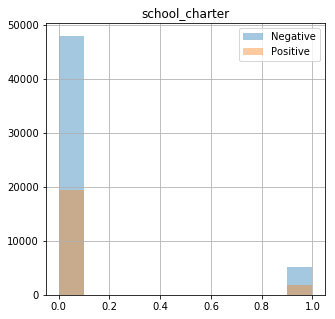

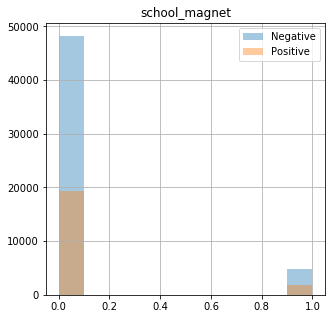

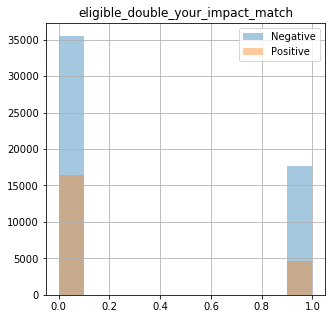

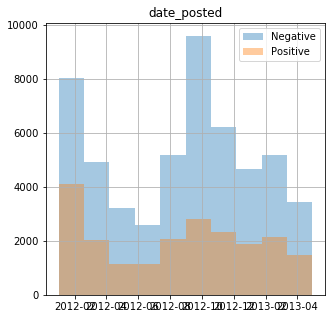

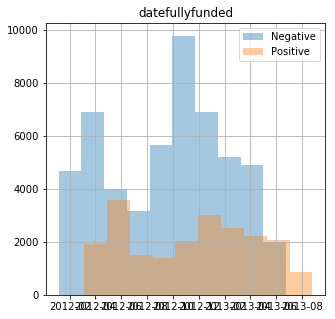

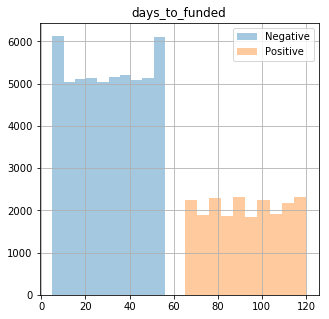

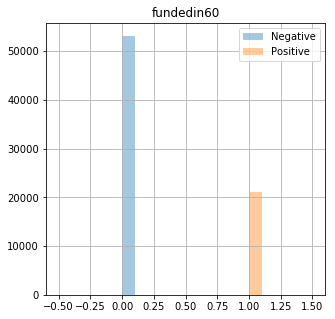

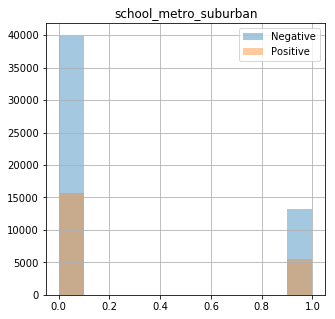

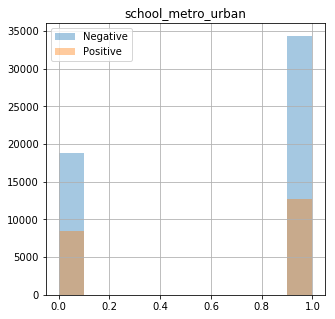

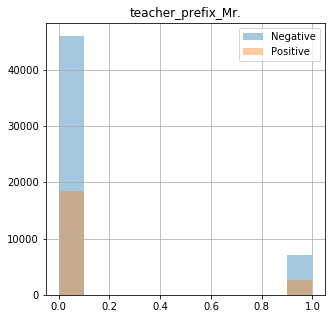

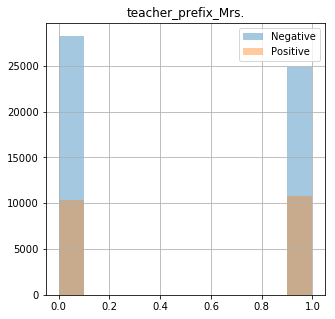

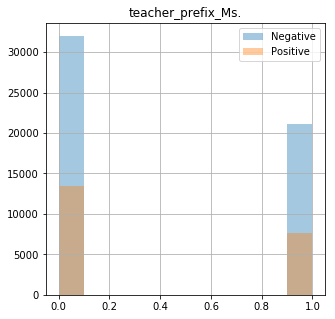

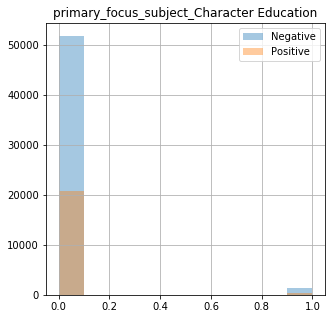

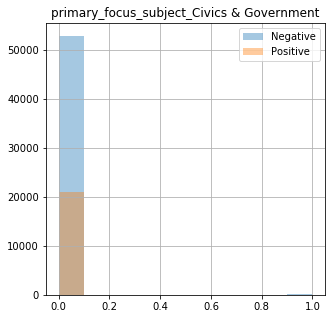

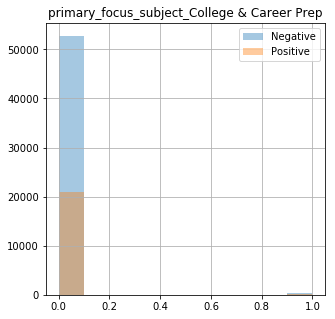

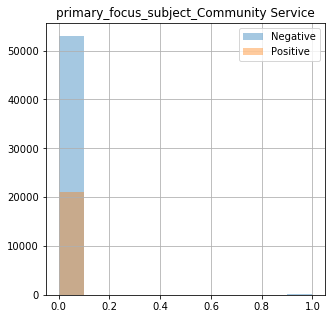

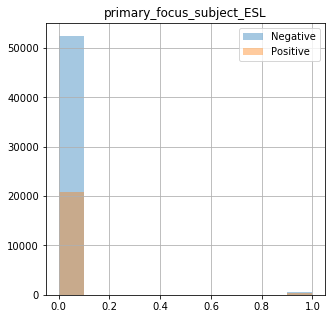

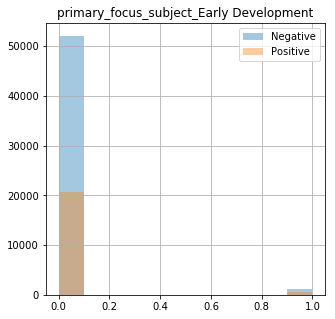

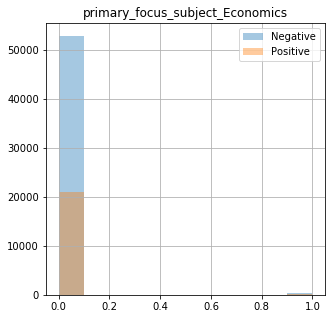

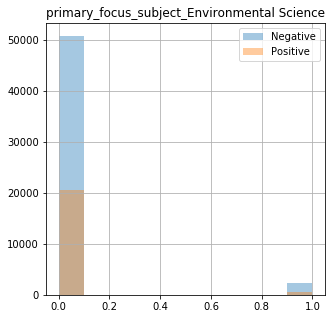

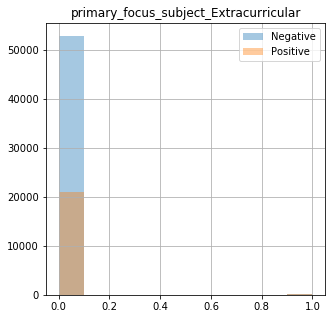

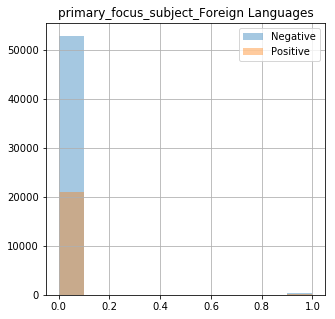

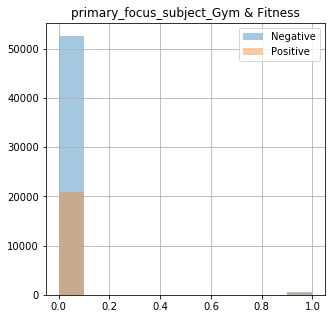

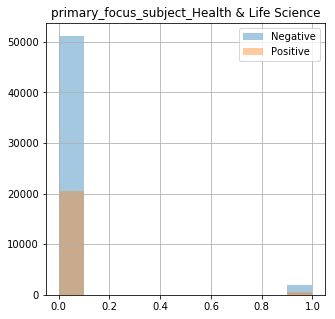

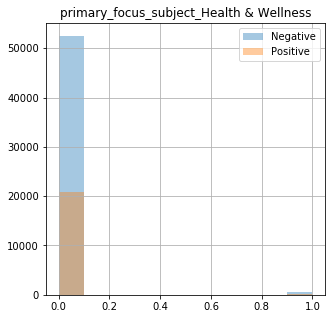

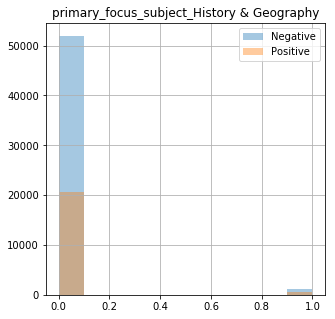

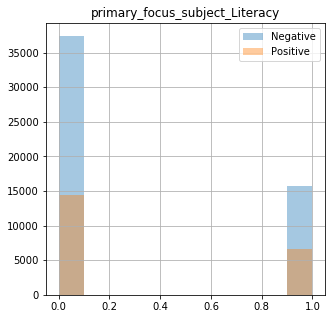

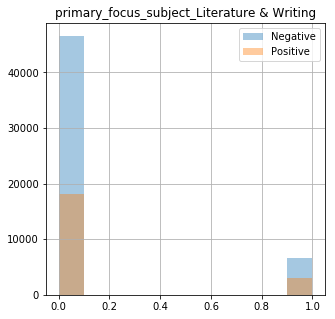

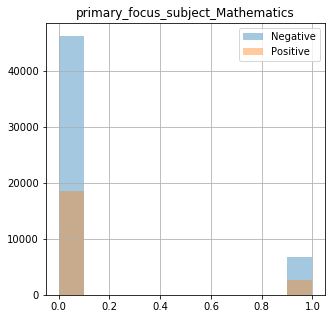

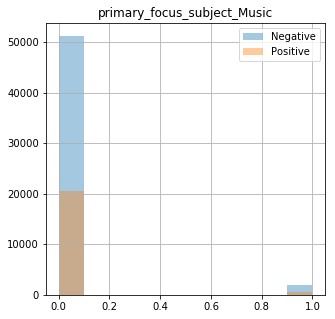

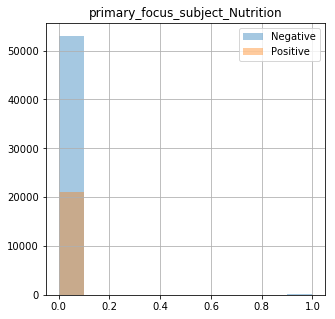

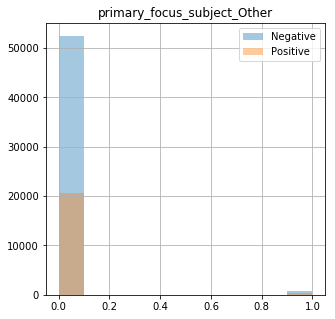

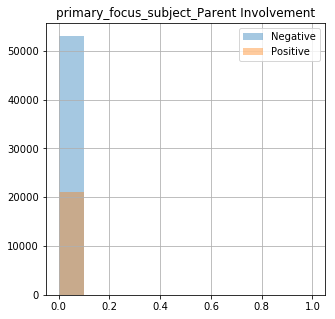

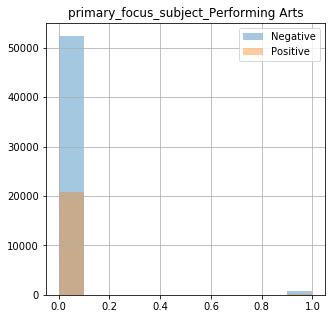

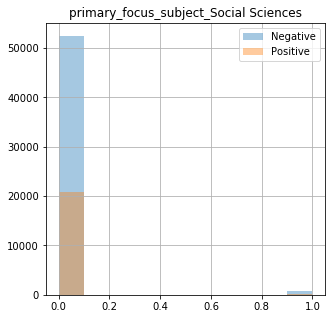

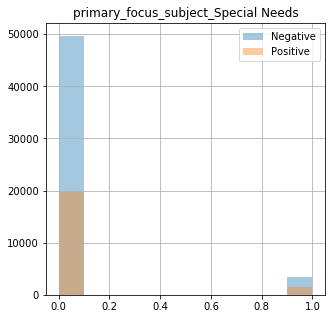

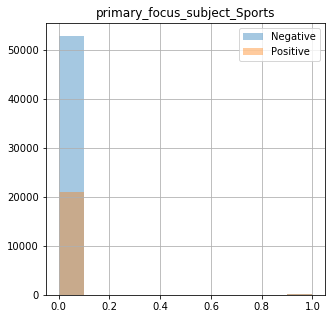

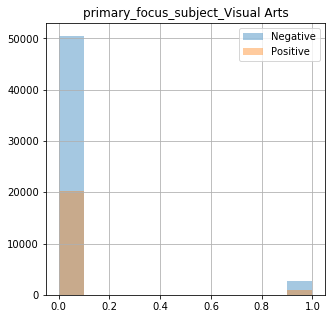

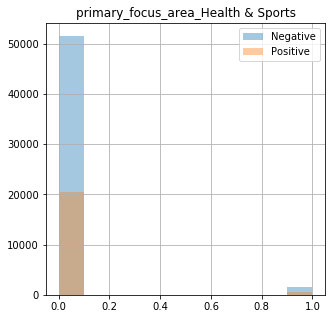

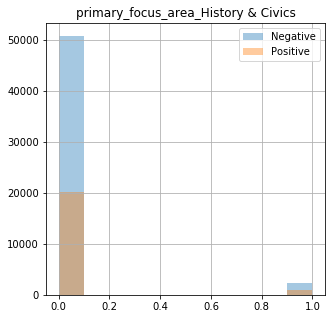

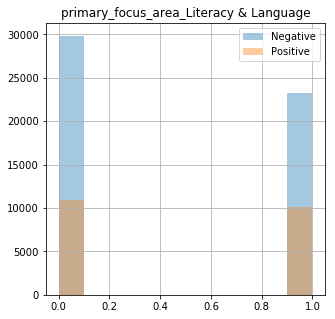

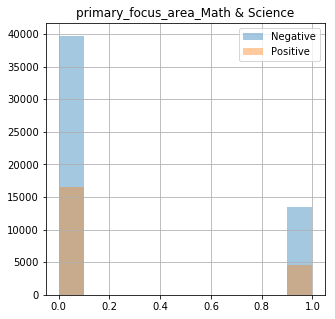

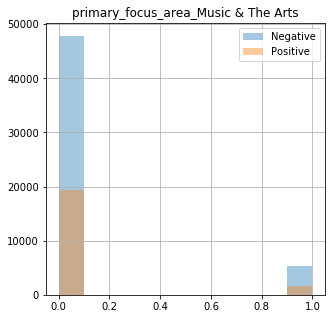

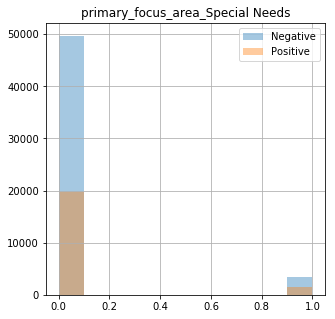

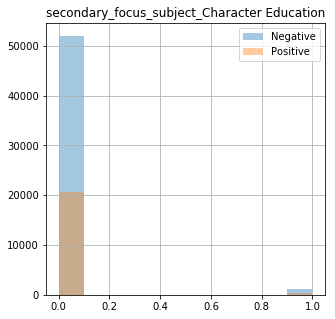

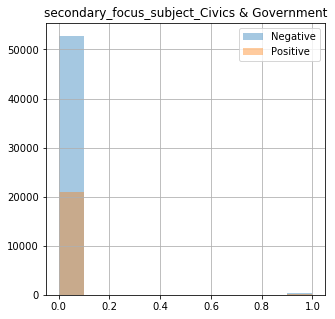

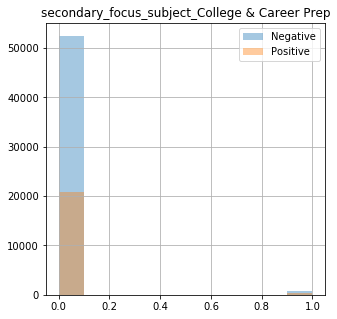

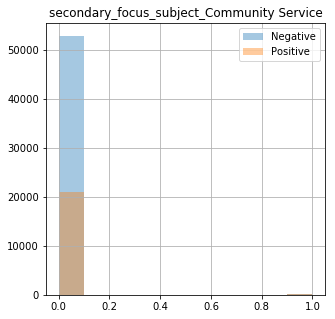

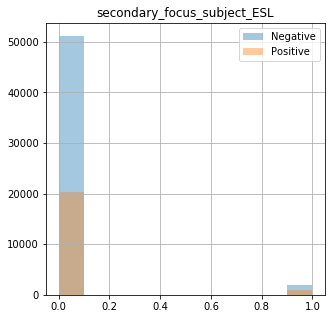

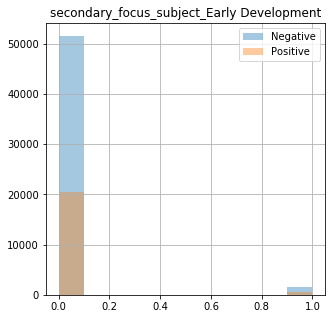

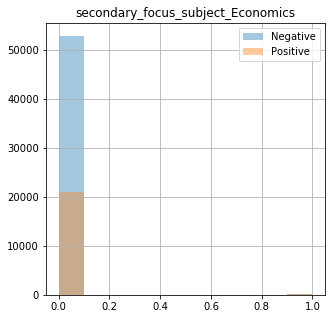

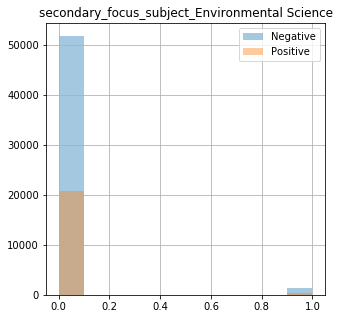

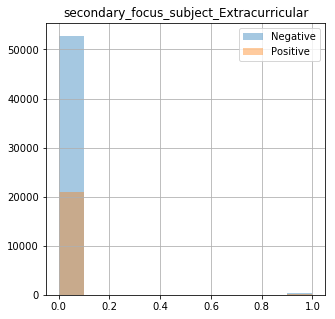

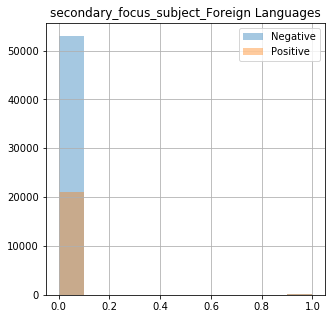

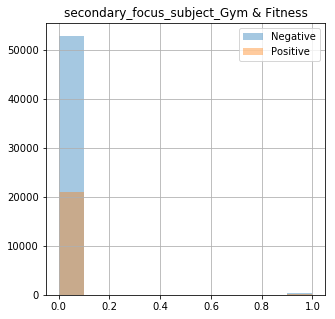

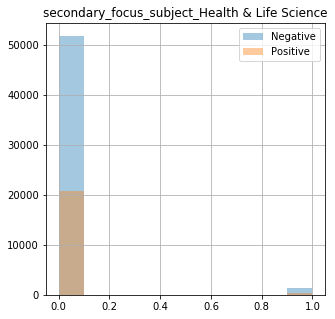

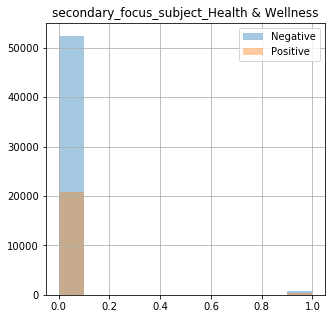

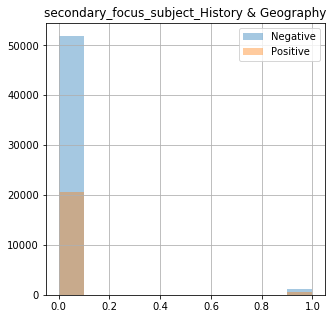

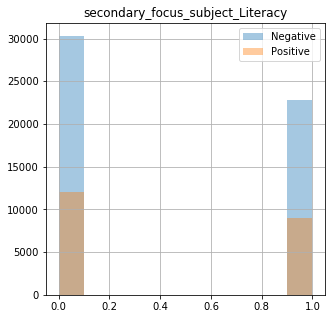

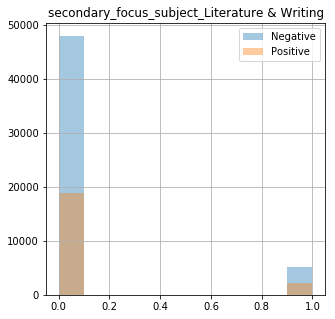

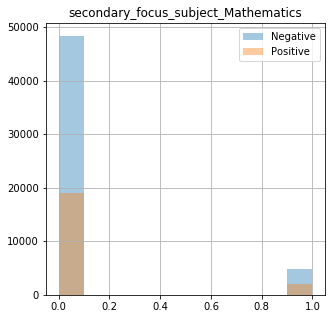

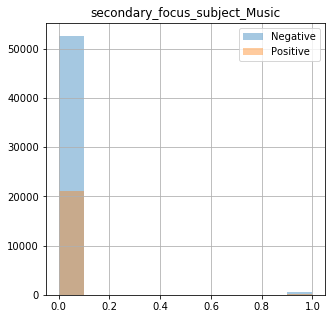

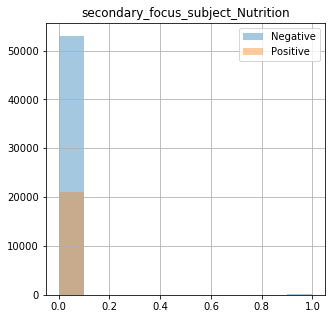

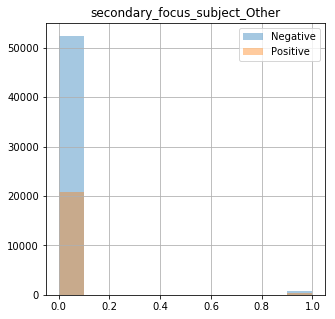

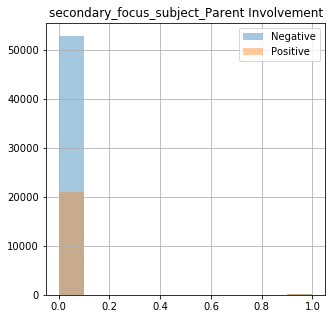

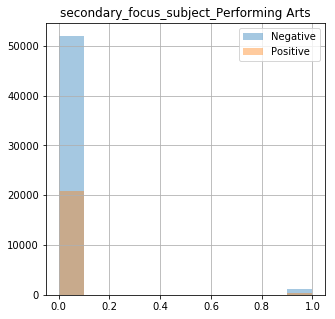

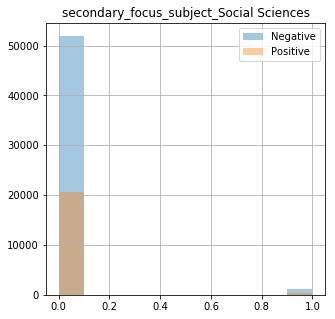

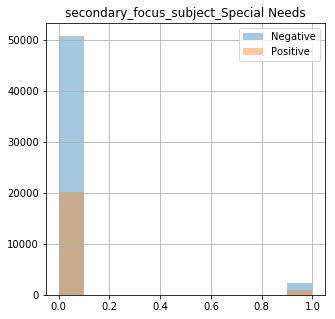

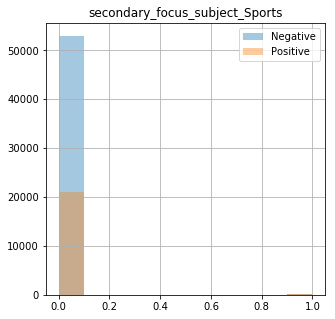

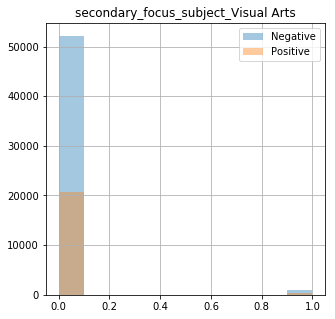

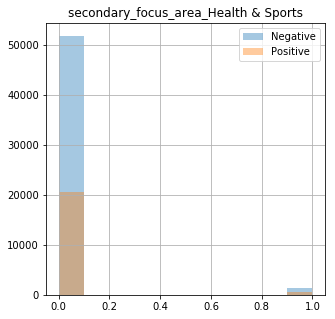

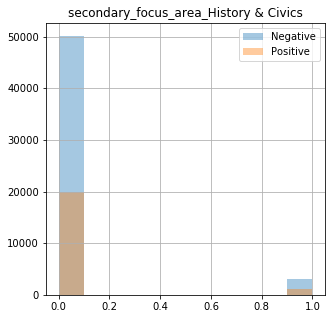

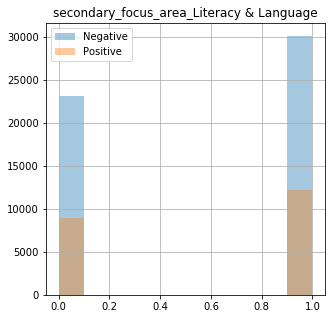

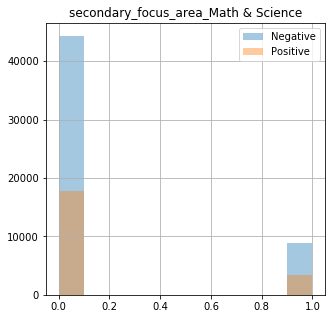

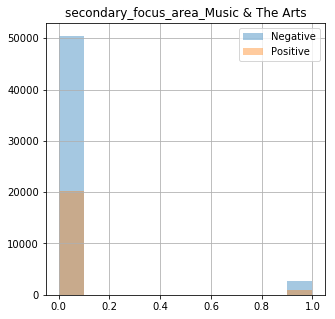

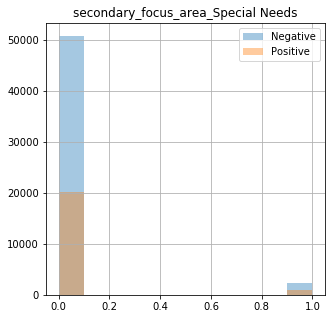

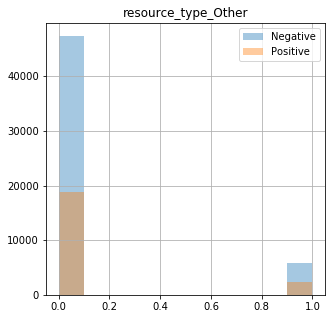

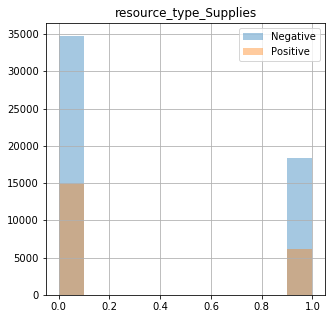

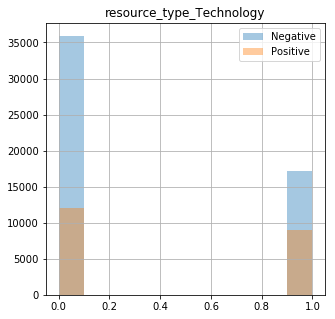

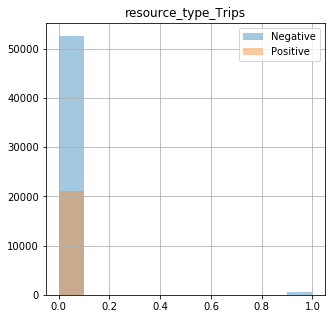

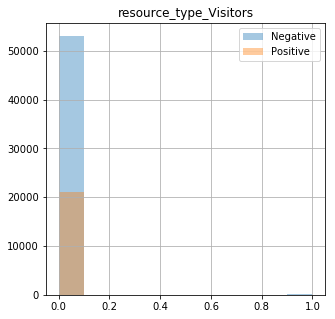

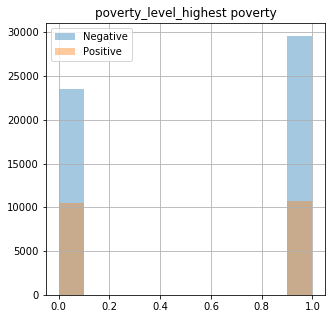

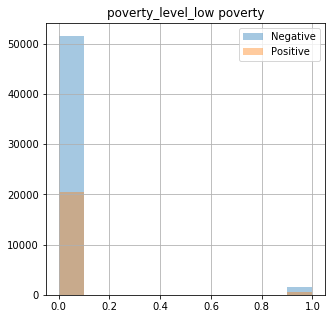

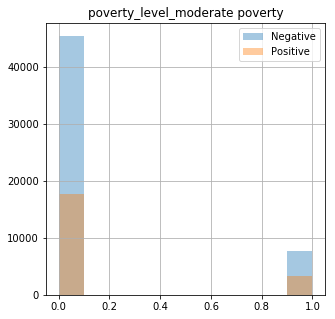

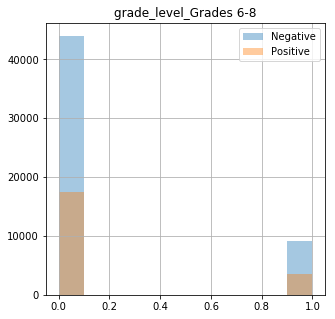

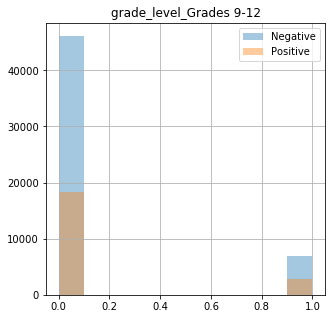

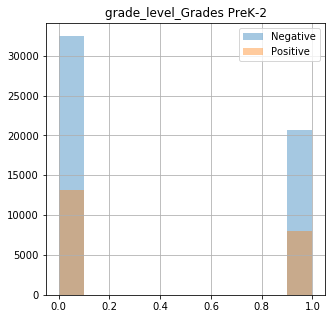

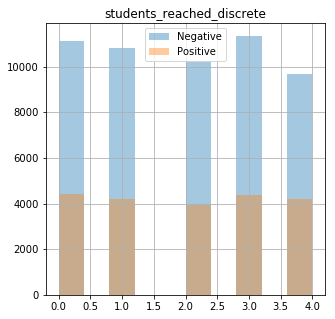

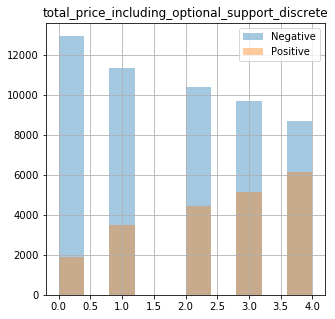

In [48]:
pl.crosshist(df_lst_5[2][0], 'fundedin60')

### Part 3: Building Models

We prepare a list of the classifiers we want to test, and the different parameters we want to try out for each classifier. These are: Logistic Regressions, K-Nearest Neighbors, Decision Trees, Support Vector Machines, Random Forests, Boosting, and Bagging.

In [49]:
classifiers = {'RF': RandomForestClassifier(n_estimators=50, n_jobs=-1),
               'AB': AdaBoostClassifier(DecisionTreeClassifier(max_depth=1), algorithm="SAMME", n_estimators=200),
               'LR': LogisticRegression(penalty='l1', C=1e5),
               'SVM': svm.SVC(kernel='linear', probability=True, random_state=0),
               'GB': GradientBoostingClassifier(learning_rate=0.05, subsample=0.5, max_depth=6, n_estimators=10),
               'DT': DecisionTreeClassifier(),
               'KNN': KNeighborsClassifier(n_neighbors=3),
               'BG': BaggingClassifier(LogisticRegression(penalty='l1', C=1e5), n_estimators=10)}

In [50]:
parameters = { 
    'RF':{'n_estimators': [10,100], 'max_depth': [5,50,100], 'max_features': ['sqrt','log2'],'min_samples_split': [2,10], 'n_jobs': [-1]},
    'LR': { 'penalty': ['l1','l2'], 'C': [0.00001,0.001,0.1,1,10]},
    'AB': { 'algorithm': ['SAMME', 'SAMME.R'], 'n_estimators': [1,10,100,1000]},
    'GB': {'n_estimators': [10,100], 'learning_rate' : [0.001,0.1,0.5],'subsample' : [0.1,0.5,1.0], 'max_depth': [5,50]},
    'DT': {'criterion': ['gini', 'entropy'], 'max_depth': [1,10,20,50,100],'min_samples_split': [2,5,10], 'min_samples_leaf': [1,2,5]},
    'SVM' :{'C' :[0.001,0.01,0.1,1,10],'kernel':['linear']},
    'KNN' :{'n_neighbors': [5,10,25,50,100],'weights': ['uniform','distance'],'algorithm': ['auto','ball_tree','kd_tree']},
    'BG': {'n_estimators' : [10, 25], 'max_samples' : [.25, .5, 1.0]}
           }

In [51]:
models_to_run = ['RF', 'AB', 'DT', 'GB', 'SVM', 'KNN', 'LR', 'BG']

In [52]:
fin_df_lst = []

In [53]:
for sublst in df_lst_5:
    print(len(sublst))
    newsublst = []
    for df in sublst:
        df = df.drop("datefullyfunded", axis = 1)
        newsublst.append(df)
    fin_df_lst.append(newsublst)

2
2
2


In [54]:
fin_df_lst[1][1].dtypes

school_charter                                              int64
school_magnet                                               int64
eligible_double_your_impact_match                           int64
date_posted                                        datetime64[ns]
days_to_funded                                              int64
fundedin60                                                  int64
school_metro_suburban                                       uint8
school_metro_urban                                          uint8
teacher_prefix_Mr.                                          uint8
teacher_prefix_Mrs.                                         uint8
teacher_prefix_Ms.                                          uint8
primary_focus_subject_Character Education                   uint8
primary_focus_subject_Civics & Government                   uint8
primary_focus_subject_College & Career Prep                 uint8
primary_focus_subject_Community Service                     uint8
primary_fo

We now loop through all possible models and parameters and run each of them, writing the results to a dataframe.

In [56]:
models, final_params = pl.magic_loop(models_to_run, classifiers, parameters, fin_df_lst, 'fundedin60', 'date_posted', splits)

[datetime.datetime(2012, 1, 1, 0, 0), datetime.datetime(2012, 4, 30, 0, 0), datetime.datetime(2012, 7, 1, 0, 0), datetime.datetime(2012, 10, 31, 0, 0)]
set 0: X train (21180, 86), y train (21180,), X test (23294, 86), y test (23294,)
Current model: RF
{'max_depth': 5, 'max_features': 'sqrt', 'min_samples_split': 2, 'n_estimators': 10, 'n_jobs': -1}
{'max_depth': 5, 'max_features': 'sqrt', 'min_samples_split': 2, 'n_estimators': 100, 'n_jobs': -1}
{'max_depth': 5, 'max_features': 'sqrt', 'min_samples_split': 10, 'n_estimators': 10, 'n_jobs': -1}
{'max_depth': 5, 'max_features': 'sqrt', 'min_samples_split': 10, 'n_estimators': 100, 'n_jobs': -1}
{'max_depth': 5, 'max_features': 'log2', 'min_samples_split': 2, 'n_estimators': 10, 'n_jobs': -1}
{'max_depth': 5, 'max_features': 'log2', 'min_samples_split': 2, 'n_estimators': 100, 'n_jobs': -1}
{'max_depth': 5, 'max_features': 'log2', 'min_samples_split': 10, 'n_estimators': 10, 'n_jobs': -1}
{'max_depth': 5, 'max_features': 'log2', 'min_sam

{'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 10}
{'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 5, 'min_samples_split': 2}
{'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 5, 'min_samples_split': 5}
{'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 5, 'min_samples_split': 10}
{'criterion': 'entropy', 'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2}
{'criterion': 'entropy', 'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 5}
{'criterion': 'entropy', 'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 10}
{'criterion': 'entropy', 'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 2}
{'criterion': 'entropy', 'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 5}
{'criterion': 'entropy', 'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 10}
{'criterion': 'entropy', 'max_depth': 20, 'min_samples_leaf': 5, 'min_samples_split': 2}
{'criterion': 'en

/Users/lilianhj/Desktop/Harris/MSCAPP/2018-2019/Spring 2019/Machine Learning/ML_for_Public_Policy/hw5/pipeline_library_updated.py:516: RuntimeWarning: invalid value encountered in double_scalars
  return 2*(p_at_k*r_at_k)/(p_at_k + r_at_k)


{'C': 1e-05, 'penalty': 'l2'}
{'C': 0.001, 'penalty': 'l1'}
{'C': 0.001, 'penalty': 'l2'}
{'C': 0.1, 'penalty': 'l1'}
{'C': 0.1, 'penalty': 'l2'}
{'C': 1, 'penalty': 'l1'}
{'C': 1, 'penalty': 'l2'}
{'C': 10, 'penalty': 'l1'}
{'C': 10, 'penalty': 'l2'}
Current model: BG
{'max_samples': 0.25, 'n_estimators': 10}
{'max_samples': 0.25, 'n_estimators': 25}
{'max_samples': 0.5, 'n_estimators': 10}
{'max_samples': 0.5, 'n_estimators': 25}
{'max_samples': 1.0, 'n_estimators': 10}
{'max_samples': 1.0, 'n_estimators': 25}
Writing baseline
[datetime.datetime(2012, 1, 1, 0, 0), datetime.datetime(2012, 10, 31, 0, 0), datetime.datetime(2013, 1, 1, 0, 0), datetime.datetime(2013, 4, 30, 0, 0)]
set 1: X train (49680, 86), y train (49680,), X test (15017, 86), y test (15017,)
Current model: RF
{'max_depth': 5, 'max_features': 'sqrt', 'min_samples_split': 2, 'n_estimators': 10, 'n_jobs': -1}
{'max_depth': 5, 'max_features': 'sqrt', 'min_samples_split': 2, 'n_estimators': 100, 'n_jobs': -1}
{'max_depth': 

{'criterion': 'entropy', 'max_depth': 1, 'min_samples_leaf': 5, 'min_samples_split': 10}
{'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2}
{'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5}
{'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 10}
{'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2}
{'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 5}
{'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 10}
{'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 5, 'min_samples_split': 2}
{'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 5, 'min_samples_split': 5}
{'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 5, 'min_samples_split': 10}
{'criterion': 'entropy', 'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2}
{'criterion': 'ent

{'algorithm': 'kd_tree', 'n_neighbors': 100, 'weights': 'uniform'}
{'algorithm': 'kd_tree', 'n_neighbors': 100, 'weights': 'distance'}
Current model: LR
{'C': 1e-05, 'penalty': 'l1'}
{'C': 1e-05, 'penalty': 'l2'}
{'C': 0.001, 'penalty': 'l1'}
{'C': 0.001, 'penalty': 'l2'}
{'C': 0.1, 'penalty': 'l1'}
{'C': 0.1, 'penalty': 'l2'}
{'C': 1, 'penalty': 'l1'}
{'C': 1, 'penalty': 'l2'}
{'C': 10, 'penalty': 'l1'}
{'C': 10, 'penalty': 'l2'}
Current model: BG
{'max_samples': 0.25, 'n_estimators': 10}
{'max_samples': 0.25, 'n_estimators': 25}
{'max_samples': 0.5, 'n_estimators': 10}
{'max_samples': 0.5, 'n_estimators': 25}
{'max_samples': 1.0, 'n_estimators': 10}
{'max_samples': 1.0, 'n_estimators': 25}
Writing baseline
[datetime.datetime(2012, 1, 1, 0, 0), datetime.datetime(2013, 4, 30, 0, 0), datetime.datetime(2013, 7, 1, 0, 0), datetime.datetime(2013, 10, 31, 0, 0)]
set 2: X train (74241, 86), y train (74241,), X test (31563, 86), y test (31563,)
Current model: RF
{'max_depth': 5, 'max_features

{'criterion': 'entropy', 'max_depth': 1, 'min_samples_leaf': 5, 'min_samples_split': 2}
{'criterion': 'entropy', 'max_depth': 1, 'min_samples_leaf': 5, 'min_samples_split': 5}
{'criterion': 'entropy', 'max_depth': 1, 'min_samples_leaf': 5, 'min_samples_split': 10}
{'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2}
{'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5}
{'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 10}
{'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2}
{'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 5}
{'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 10}
{'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 5, 'min_samples_split': 2}
{'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 5, 'min_samples_split': 5}
{'criterion': 'entrop

{'algorithm': 'kd_tree', 'n_neighbors': 50, 'weights': 'uniform'}
{'algorithm': 'kd_tree', 'n_neighbors': 50, 'weights': 'distance'}
{'algorithm': 'kd_tree', 'n_neighbors': 100, 'weights': 'uniform'}
{'algorithm': 'kd_tree', 'n_neighbors': 100, 'weights': 'distance'}
Current model: LR
{'C': 1e-05, 'penalty': 'l1'}
{'C': 1e-05, 'penalty': 'l2'}
{'C': 0.001, 'penalty': 'l1'}
{'C': 0.001, 'penalty': 'l2'}
{'C': 0.1, 'penalty': 'l1'}
{'C': 0.1, 'penalty': 'l2'}
{'C': 1, 'penalty': 'l1'}
{'C': 1, 'penalty': 'l2'}
{'C': 10, 'penalty': 'l1'}
{'C': 10, 'penalty': 'l2'}
Current model: BG
{'max_samples': 0.25, 'n_estimators': 10}
{'max_samples': 0.25, 'n_estimators': 25}
{'max_samples': 0.5, 'n_estimators': 10}
{'max_samples': 0.5, 'n_estimators': 25}
{'max_samples': 1.0, 'n_estimators': 10}
{'max_samples': 1.0, 'n_estimators': 25}
Writing baseline


### Part 4: Evaluating models

We now look at the models' performance on different metrics. All of these are explained in more detail in the accompanying writeup.

In [57]:
models.head(n=20)

,train_start,train_end,test_start,test_end,model_type,clf,parameters,auc-roc,p_at_1,p_at_2,p_at_5,p_at_10,p_at_20,p_at_30,p_at_50,r_at_1,r_at_2,r_at_5,r_at_10,r_at_20,r_at_30,r_at_50,f1_at_1,f1_at_2,f1_at_5,f1_at_10,f1_at_20,f1_at_30,f1_at_50
0,2012-01-01,2012-04-30,2012-07-01,2012-10-31,RF,"(DecisionTreeClassifier(class_weight=None, cri...","{'max_depth': 5, 'max_features': 'sqrt', 'min_...",0.507473,1,1,1,1,1,0.829708,0.497811,0.0400138,0.0802001,0.200759,0.40169,0.80338,1,1,0.0769486,0.148491,0.334387,0.573151,0.890972,0.906929,0.664718
1,2012-01-01,2012-04-30,2012-07-01,2012-10-31,RF,"(DecisionTreeClassifier(class_weight=None, cri...","{'max_depth': 5, 'max_features': 'sqrt', 'min_...",0.503971,1,1,1,1,1,0.829708,0.497811,0.0400138,0.0802001,0.200759,0.40169,0.80338,1,1,0.0769486,0.148491,0.334387,0.573151,0.890972,0.906929,0.664718
2,2012-01-01,2012-04-30,2012-07-01,2012-10-31,RF,"(DecisionTreeClassifier(class_weight=None, cri...","{'max_depth': 5, 'max_features': 'sqrt', 'min_...",0.505592,1,1,1,1,1,0.829708,0.497811,0.0400138,0.0802001,0.200759,0.40169,0.80338,1,1,0.0769486,0.148491,0.334387,0.573151,0.890972,0.906929,0.664718
3,2012-01-01,2012-04-30,2012-07-01,2012-10-31,RF,"(DecisionTreeClassifier(class_weight=None, cri...","{'max_depth': 5, 'max_features': 'sqrt', 'min_...",0.505250,1,1,1,1,1,0.829708,0.497811,0.0400138,0.0802001,0.200759,0.40169,0.80338,1,1,0.0769486,0.148491,0.334387,0.573151,0.890972,0.906929,0.664718
4,2012-01-01,2012-04-30,2012-07-01,2012-10-31,RF,"(DecisionTreeClassifier(class_weight=None, cri...","{'max_depth': 5, 'max_features': 'log2', 'min_...",0.504221,1,1,1,1,1,0.829708,0.497811,0.0400138,0.0802001,0.200759,0.40169,0.80338,1,1,0.0769486,0.148491,0.334387,0.573151,0.890972,0.906929,0.664718
5,2012-01-01,2012-04-30,2012-07-01,2012-10-31,RF,"(DecisionTreeClassifier(class_weight=None, cri...","{'max_depth': 5, 'max_features': 'log2', 'min_...",0.504439,1,1,1,1,1,0.829708,0.497811,0.0400138,0.0802001,0.200759,0.40169,0.80338,1,1,0.0769486,0.148491,0.334387,0.573151,0.890972,0.906929,0.664718
6,2012-01-01,2012-04-30,2012-07-01,2012-10-31,RF,"(DecisionTreeClassifier(class_weight=None, cri...","{'max_depth': 5, 'max_features': 'log2', 'min_...",0.502142,1,1,1,1,0.999571,0.790927,0.49721,0.0400138,0.0802001,0.200759,0.40169,0.803036,0.95326,0.998793,0.0769486,0.148491,0.334387,0.573151,0.890589,0.864539,0.663915
7,2012-01-01,2012-04-30,2012-07-01,2012-10-31,RF,"(DecisionTreeClassifier(class_weight=None, cri...","{'max_depth': 5, 'max_features': 'log2', 'min_...",0.503552,1,1,1,1,1,0.829708,0.497811,0.0400138,0.0802001,0.200759,0.40169,0.80338,1,1,0.0769486,0.148491,0.334387,0.573151,0.890972,0.906929,0.664718
8,2012-01-01,2012-04-30,2012-07-01,2012-10-31,RF,"(DecisionTreeClassifier(class_weight=None, cri...","{'max_depth': 50, 'max_features': 'sqrt', 'min...",0.504752,1,1,1,1,1,0.829708,0.497811,0.0400138,0.0802001,0.200759,0.40169,0.80338,1,1,0.0769486,0.148491,0.334387,0.573151,0.890972,0.906929,0.664718
9,2012-01-01,2012-04-30,2012-07-01,2012-10-31,RF,"(DecisionTreeClassifier(class_weight=None, cri...","{'max_depth': 50, 'max_features': 'sqrt', 'min...",0.506292,1,1,1,1,1,0.829708,0.497811,0.0400138,0.0802001,0.200759,0.40169,0.80338,1,1,0.0769486,0.148491,0.334387,0.573151,0.890972,0.906929,0.664718


In [58]:
num_cols = [col for col in models.columns if col not in ['train_start', 'train_end', 'test_start', 'test_end', 'model_type', 'clf', 'parameters']]
num_cols

['auc-roc',
 'p_at_1',
 'p_at_2',
 'p_at_5',
 'p_at_10',
 'p_at_20',
 'p_at_30',
 'p_at_50',
 'r_at_1',
 'r_at_2',
 'r_at_5',
 'r_at_10',
 'r_at_20',
 'r_at_30',
 'r_at_50',
 'f1_at_1',
 'f1_at_2',
 'f1_at_5',
 'f1_at_10',
 'f1_at_20',
 'f1_at_30',
 'f1_at_50']

In [59]:
for col in num_cols:
    models[col] = pd.to_numeric(models[col], errors='coerce')

We split the results dataframe into baseline models (which only count the number of positive outcomes in the dataset - this is the accuracy we would get if a naive classifier simply predicted every observation as positive) and non-baseline models.

We see that the baseline accuracy is 24.9% for the first training dataset, 29.8% for the second, and 26.7% for the third.

In [60]:
models_non_baseline = models[models['model_type'] != 'baseline']

In [61]:
models_baseline = models[models['model_type'] == 'baseline']

In [62]:
models_baseline

,train_start,train_end,test_start,test_end,model_type,clf,parameters,auc-roc,p_at_1,p_at_2,p_at_5,p_at_10,p_at_20,p_at_30,p_at_50,r_at_1,r_at_2,r_at_5,r_at_10,r_at_20,r_at_30,r_at_50,f1_at_1,f1_at_2,f1_at_5,f1_at_10,f1_at_20,f1_at_30,f1_at_50
209,2012-01-01,2012-04-30,2012-07-01,2012-10-31,baseline,,,0.248905,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
419,2012-01-01,2012-10-31,2013-01-01,2013-04-30,baseline,,,0.298395,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
629,2012-01-01,2013-04-30,2013-07-01,2013-10-31,baseline,,,0.266990,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [63]:
pl.summ_stats(models_non_baseline)

,auc-roc,p_at_1,p_at_2,p_at_5,p_at_10,p_at_20,p_at_30,p_at_50,r_at_1,r_at_2,r_at_5,r_at_10,r_at_20,r_at_30,r_at_50,f1_at_1,f1_at_2,f1_at_5,f1_at_10,f1_at_20,f1_at_30,f1_at_50
count,627.000000,627.000000,627.000000,627.000000,627.000000,627.000000,627.000000,627.000000,627.000000,627.000000,627.000000,627.000000,627.000000,627.000000,627.000000,626.000000,626.000000,626.000000,626.000000,626.000000,627.000000,627.000000
mean,0.501062,0.998405,0.998405,0.998405,0.998405,0.998132,0.902913,0.542834,0.036892,0.073881,0.184809,0.369749,0.739371,0.997810,0.999921,0.071256,0.137754,0.312158,0.539922,0.849697,0.946665,0.702760
std,0.003164,0.039936,0.039936,0.039936,0.039936,0.040106,0.074620,0.040921,0.003064,0.006194,0.015575,0.031125,0.062206,0.033373,0.001296,0.005002,0.009457,0.019593,0.029341,0.036547,0.048965,0.034129
min,0.494589,0.000000,0.000000,0.000000,0.000000,0.000000,0.166428,0.497124,0.000000,0.000000,0.000000,0.000000,0.000000,0.200586,0.972774,0.064781,0.125497,0.286752,0.501839,0.765099,0.181918,0.663801
25%,0.496930,1.000000,1.000000,1.000000,1.000000,1.000000,0.829708,0.497811,0.033475,0.066949,0.167373,0.334970,0.670163,1.000000,1.000000,0.064781,0.125497,0.286752,0.501839,0.802512,0.906929,0.664718
50%,0.502050,1.000000,1.000000,1.000000,1.000000,1.000000,0.890051,0.533997,0.037380,0.074878,0.187255,0.374511,0.749021,1.000000,1.000000,0.072066,0.139324,0.315442,0.544937,0.856503,0.941827,0.696216
75%,0.503197,1.000000,1.000000,1.000000,1.000000,1.000000,0.994673,0.596830,0.040014,0.080200,0.200759,0.401690,0.803380,1.000000,1.000000,0.076949,0.148491,0.334387,0.573151,0.890972,0.997329,0.747519
max,0.509357,1.000000,1.000000,1.000000,1.000000,1.000000,0.994673,0.596830,0.040014,0.080200,0.200759,0.401690,0.803380,1.000000,1.000000,0.076949,0.148491,0.334387,0.573151,0.890972,0.997329,0.747519


In [64]:
pl.make_percent_table(models_non_baseline, "r_at_20")

,r_at_20,count,percent
0,0.000000,1,0.159490
1,0.638920,1,0.159490
2,0.670163,208,33.173844
3,0.695859,1,0.159490
4,0.748546,1,0.159490
5,0.748665,1,0.159490
6,0.748902,1,0.159490
7,0.749021,205,32.695375
8,0.769403,1,0.159490
9,0.795792,1,0.159490


The folowing is for the purposes of the writeup and explained in more detail there.

This is the non-baseline model with the highest AUC-ROC score, and its parameters.

In [65]:
models_non_baseline.loc[models_non_baseline['auc-roc'].idxmax()]

train_start                                  2012-01-01 00:00:00
train_end                                    2012-10-31 00:00:00
test_start                                   2013-01-01 00:00:00
test_end                                     2013-04-30 00:00:00
model_type                                                    LR
clf            LogisticRegression(C=10, class_weight=None, du...
parameters                         {'C': 0.001, 'penalty': 'l1'}
auc-roc                                                 0.509357
p_at_1                                                         1
p_at_2                                                         1
p_at_5                                                         1
p_at_10                                                        1
p_at_20                                                        1
p_at_30                                                 0.994673
p_at_50                                                  0.59683
r_at_1                   

In [66]:
final_params[404]

{'C': 0.001, 'penalty': 'l1'}

This is the model with the highest F1 score at the 5% threshold, and its parameters.

In [67]:
models_non_baseline.loc[models_non_baseline['f1_at_5'].idxmax()]

train_start                                  2012-01-01 00:00:00
train_end                                    2012-04-30 00:00:00
test_start                                   2012-07-01 00:00:00
test_end                                     2012-10-31 00:00:00
model_type                                                    RF
clf            (DecisionTreeClassifier(class_weight=None, cri...
parameters     {'max_depth': 5, 'max_features': 'sqrt', 'min_...
auc-roc                                                 0.507473
p_at_1                                                         1
p_at_2                                                         1
p_at_5                                                         1
p_at_10                                                        1
p_at_20                                                        1
p_at_30                                                 0.829708
p_at_50                                                 0.497811
r_at_1                   

In [68]:
final_params[0]

{'max_depth': 5,
 'max_features': 'sqrt',
 'min_samples_split': 2,
 'n_estimators': 10,
 'n_jobs': -1}

In [69]:
train = fin_df_lst[2][0]
test = fin_df_lst[2][1]
y_train = train['fundedin60']
X_train = train.drop(['fundedin60', 'date_posted'], axis = 1)
y_test = test['fundedin60']
X_test = test.drop(['fundedin60', 'date_posted'], axis = 1)

In [70]:
auc_best = LogisticRegression(C=0.001, penalty='l1')

In [71]:
auc_best.fit(X_train,y_train)

LogisticRegression(C=0.001, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [72]:
auc_y_pred = auc_best.predict_proba(X_test)[:,1]

In [74]:
best = RandomForestClassifier(max_depth=5, max_features='sqrt', min_samples_split=2, n_estimators=10, n_jobs=-1)

In [75]:
best.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=-1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [76]:
y_pred = best.predict_proba(X_test)[:,1]

This is the precision-recall curve for the model with the best F1 score at the 5% threshold.

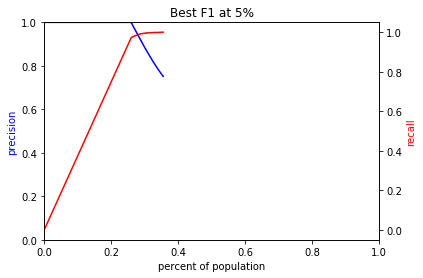

In [77]:
pl.plot_precision_recall_n(y_test, y_pred, "Best F1 at 5%")

The following examines the average performance of each type of classifier, for each timeframe of training data - the last timeframe, then the first, then the second.

In [78]:
models_last = models_non_baseline[models_non_baseline['test_start'] == '2013-07-01']

In [90]:
models_last.groupby('model_type')["p_at_20"].mean()

model_type
AB     1.000000
BG     1.000000
DT     1.000000
GB     1.000000
KNN    1.000000
LR     0.992823
RF     0.999980
SVM    1.000000
Name: p_at_20, dtype: float64

In [80]:
models_last.groupby('model_type')["r_at_10"].mean()

model_type
AB     0.374511
BG     0.374511
DT     0.374511
GB     0.374511
KNN    0.374511
LR     0.374499
RF     0.374511
SVM    0.374511
Name: r_at_10, dtype: float64

In [92]:
models_last.groupby('model_type')["auc-roc"].mean()

model_type
AB     0.496930
BG     0.497927
DT     0.496930
GB     0.496930
KNN    0.496930
LR     0.496232
RF     0.498741
SVM    0.495866
Name: auc-roc, dtype: float64

In [82]:
models_first = models_non_baseline[models_non_baseline['test_start'] == '2012-07-01']

In [83]:
models_first.groupby('model_type')["r_at_10"].mean()

model_type
AB     0.401690
BG     0.401690
DT     0.401690
GB     0.401690
KNN    0.401690
LR     0.361521
RF     0.401690
SVM    0.401690
Name: r_at_10, dtype: float64

In [93]:
models_first.groupby('model_type')["auc-roc"].mean()

model_type
AB     0.503197
BG     0.503678
DT     0.503197
GB     0.503197
KNN    0.503197
LR     0.504207
RF     0.504476
SVM    0.503934
Name: auc-roc, dtype: float64

In [85]:
models_second = models_non_baseline[models_non_baseline['test_start'] == '2013-01-01']

In [91]:
models_second.groupby('model_type')["r_at_20"].mean()

model_type
AB     0.670163
BG     0.670163
DT     0.670163
GB     0.670163
KNN    0.670163
LR     0.667039
RF     0.670163
SVM    0.670163
Name: r_at_20, dtype: float64

In [94]:
models_second.groupby('model_type')["auc-roc"].mean()

model_type
AB     0.502050
BG     0.508731
DT     0.502050
GB     0.502050
KNN    0.502050
LR     0.508211
RF     0.501610
SVM    0.509010
Name: auc-roc, dtype: float64